### Name:       Ghulam Mustafa
### Roll:       FA22-BSCS-188
### Section:    E
____________________________________
# ASSIGNMENT:  DATA PRE-PROCESSING
# AI LAB

____________________

## LOAN DATASET PRE PROCESSING

________________

        Imports

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

        Data Import

In [5]:
data = pd.read_csv('loan_data.csv')

In [6]:
data.head()

,Text,Income,Credit_Score,Loan_Amount,DTI_Ratio,Employment_Status,Approval
0,I need a loan to pay for an international vaca...,26556,581,8314,79.26,employed,Rejected
1,I want to make home improvements like installi...,197392,389,111604,22.14,employed,Rejected
2,"I need a loan for home renovation, including a...",44561,523,34118,45.44,employed,Rejected
3,I need funds to buy new furniture and applianc...,190363,729,118757,10.22,unemployed,Rejected
4,I need a loan to start a small business.,61853,732,19210,44.13,employed,Approved


In [7]:
data.describe()

,Income,Credit_Score,Loan_Amount,DTI_Ratio
count,24000.000000,24000.000000,24000.000000,24000.000000
mean,110377.552708,575.720333,44356.154833,34.719167
std,51729.677627,159.227621,34666.604785,32.322471
min,20001.000000,300.000000,1005.000000,2.530000
25%,65635.750000,437.000000,16212.000000,14.507500
50%,110464.000000,575.000000,35207.000000,24.860000
75%,155187.000000,715.000000,65622.750000,41.840000
max,200000.000000,850.000000,158834.000000,246.330000


In [8]:
data.shape

(24000, 7)

_____________________

### HANDLING MISSING DATA

 We are gonna fill all columns with missing values, with mean, mode and median values

In [9]:
data['Income'] = data['Income'].fillna(data['Income'].median())
data['Credit_Score'] = data['Credit_Score'].fillna(data['Credit_Score'].median())
data['Loan_Amount'] = data['Loan_Amount'].fillna(data['Loan_Amount'].median())
data['DTI_Ratio'] = data['DTI_Ratio'].fillna(data['DTI_Ratio'].mean())
data['Employment_Status'] = data['Employment_Status'].fillna(data['Employment_Status'].mode()[0])
data['Approval'] = data['Approval'].fillna(data['Approval'].mode()[0])

### Dropping Duplicates

In [10]:
data.drop_duplicates(inplace=True)

### DELETING UN NECESSARY COLUMNS

In [11]:
data.drop(columns=['Text'], inplace=True)

In [12]:
data.head()

,Income,Credit_Score,Loan_Amount,DTI_Ratio,Employment_Status,Approval
0,26556,581,8314,79.26,employed,Rejected
1,197392,389,111604,22.14,employed,Rejected
2,44561,523,34118,45.44,employed,Rejected
3,190363,729,118757,10.22,unemployed,Rejected
4,61853,732,19210,44.13,employed,Approved


## Convert target column to binary

In [13]:
data['Approval'] = data['Approval'].map({'Rejected': 0, 'Approved': 1})

In [14]:
data['Employed'] = data['Employment_Status'].map({'employed': 1, 'unemployed': 0})
data.drop(columns=['Employment_Status'], inplace=True)

In [15]:
data.head()

,Income,Credit_Score,Loan_Amount,DTI_Ratio,Approval,Employed
0,26556,581,8314,79.26,0,1
1,197392,389,111604,22.14,0,1
2,44561,523,34118,45.44,0,1
3,190363,729,118757,10.22,0,0
4,61853,732,19210,44.13,1,1


## TEST - TRAIN SPLIT

In [16]:
X = data.drop('Approval', axis=1)
y = data['Approval']

In [17]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

In [18]:
print("X_train Shape:  ", X_train.shape)
print("y_train Shape:  ", y_train.shape)
print("X_test Shape:  ", X_test.shape)
print("y_test Shape:  ", y_test.shape)

X_train Shape:   (16800, 5)
y_train Shape:   (16800,)
X_test Shape:   (7200, 5)
y_test Shape:   (7200,)


_________________________

## GRAPH PLOTTING

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
sns.set(style="whitegrid") 

### Histogram :  Showing Income Distribution

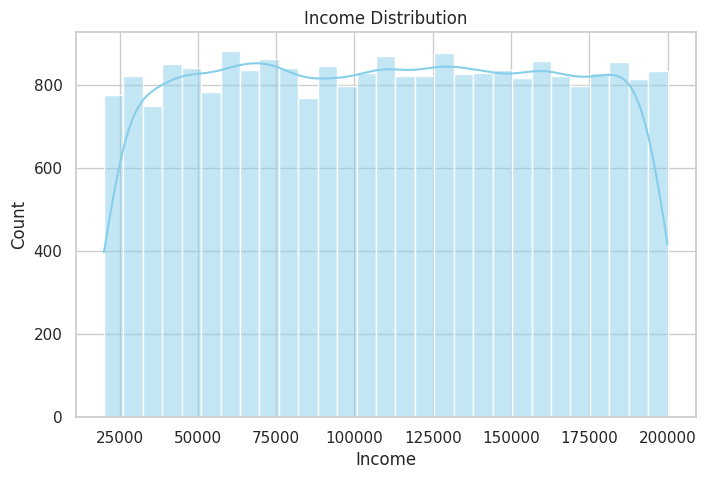

In [21]:
plt.figure(figsize=(8, 5))
sns.histplot(data['Income'], kde=True, color='skyblue')
plt.title("Income Distribution")
plt.xlabel("Income")
plt.ylabel("Count")
plt.show()


### Box Plot – DTI Ratio

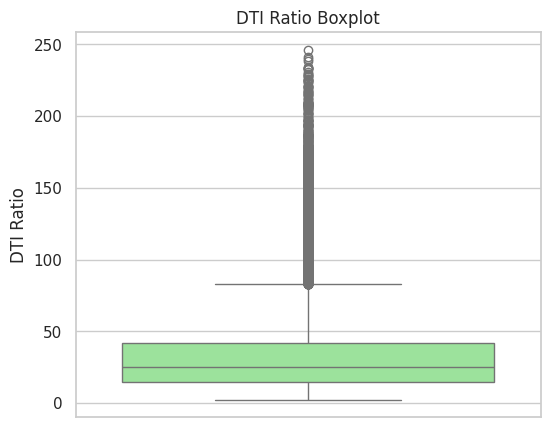

In [22]:
plt.figure(figsize=(6, 5))
sns.boxplot(y=data['DTI_Ratio'], color='lightgreen')
plt.title("DTI Ratio Boxplot")
plt.ylabel("DTI Ratio")
plt.show()

### Scatter Plot – Credit Score vs Loan Amou

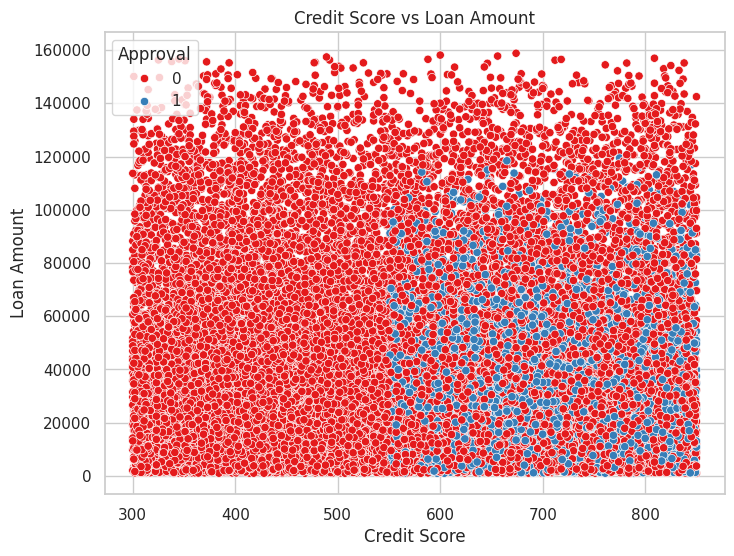

In [23]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Credit_Score', y='Loan_Amount', data=data, hue='Approval', palette='Set1')
plt.title("Credit Score vs Loan Amount")
plt.xlabel("Credit Score")
plt.ylabel("Loan Amount")
plt.legend(title='Approval')
plt.show()

### Bar Plot – Employment Status vs Approval

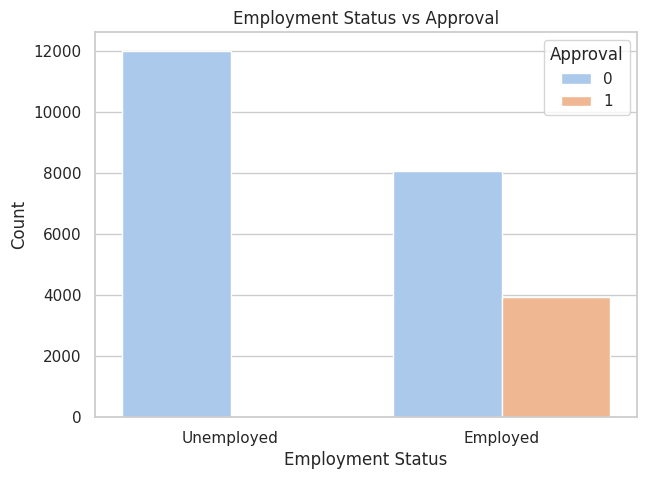

In [24]:
plt.figure(figsize=(7, 5))
sns.countplot(x='Employed', hue='Approval', data=data, palette='pastel')
plt.title("Employment Status vs Approval")
plt.xticks([0, 1], ['Unemployed', 'Employed'])
plt.xlabel("Employment Status")
plt.ylabel("Count")
plt.legend(title='Approval')
plt.show()

### Line Plot – Loan Amount over Credit Score

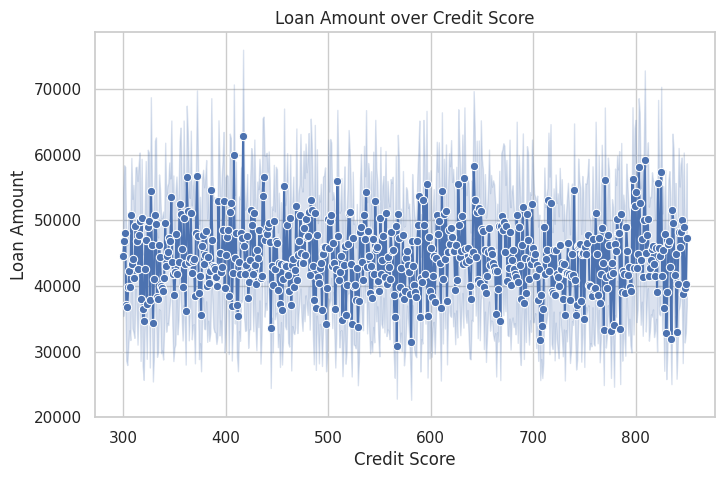

In [25]:
sorted_data = data.sort_values(by='Credit_Score')
plt.figure(figsize=(8, 5))
sns.lineplot(x='Credit_Score', y='Loan_Amount', data=sorted_data, marker='o')
plt.title("Loan Amount over Credit Score")
plt.xlabel("Credit Score")
plt.ylabel("Loan Amount")
plt.show()

### Heatmap: Feature COllection

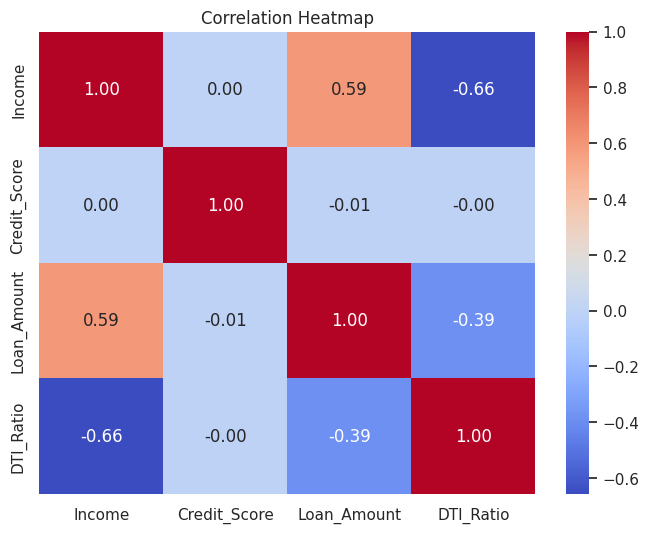

In [27]:
plt.figure(figsize=(8, 6))
corr = data[['Income', 'Credit_Score', 'Loan_Amount', 'DTI_Ratio']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()